# ITMAL Exercise

REVISIONS| |
---------| |
2018-0301| CEF, initial.
2018-0306| CEF, updated.
2018-0307| CEF, split Qb into Qb+c+d and added NN comment.
2018-0311| CEF, updated Qa and $w_0$ issues.
2018-0311| CEF, updated Qd with plot and Q.
2018-0311| CEF, clarified $w_0$ issue and update $\tilde{J}$'s.


## Regulizers

### Resume of The Linear Regressor

For our  data set $\mathbf{X}$ and target $\mathbf{y}$ 

$$
    \newcommand\rem[1]{}
    \rem{ITMAL: CEF def and LaTeX commands, remember: no newlines in defs}
    \newcommand\eq[2]{#1 &=& #2\\}
    \newcommand\ar[2]{\begin{array}{#1}#2\end{array}}
    \newcommand\ac[2]{\left[\ar{#1}{#2}\right]}
    \newcommand\st[1]{_{\mbox{\scriptsize #1}}}
    \newcommand\norm[1]{{\cal L}_{#1}}
    \newcommand\obs[2]{#1_{\mbox{\scriptsize obs}}^{\left(#2\right)}}
    \newcommand\diff[1]{\mbox{d}#1}
    \newcommand\pown[1]{^{(#1)}}
    \def\pownn{\pown{n}}
    \def\powni{\pown{i}}
    \def\powtest{\pown{\mbox{\scriptsize test}}}
    \def\powtrain{\pown{\mbox{\scriptsize train}}}
    \def\bX{\mathbf{M}}
    \def\bX{\mathbf{X}}
    \def\bZ{\mathbf{Z}}
    \def\bw{\mathbf{m}}
    \def\bx{\mathbf{x}}
    \def\by{\mathbf{y}}
    \def\bz{\mathbf{z}}
    \def\bw{\mathbf{w}}
    \def\btheta{{\boldsymbol\theta}}
    \def\bSigma{{\boldsymbol\Sigma}}
    \def\half{\frac{1}{2}}
    \newcommand\pfrac[2]{\frac{\partial~#1}{\partial~#2}}
    \newcommand\dfrac[2]{\frac{\mbox{d}~#1}{\mbox{d}#2}}
\bX =
        \ac{cccc}{
            x_1\pown{1} & x_2\pown{1} & \cdots & x_d\pown{1} \\
            x_1\pown{2} & x_2\pown{2} & \cdots & x_d\pown{2}\\
            \vdots      &             &        & \vdots \\
            x_1\pownn   & x_2\pownn   & \cdots & x_d\pownn\\
    }
, ~~~~~~~~
\by =
  \ac{c}{
     y\pown{1} \\
     y\pown{2} \\
     \vdots \\
     y\pown{n} \\
  }
$$

a __linear regressor__  model was previously found to be of the form

$$
\ar{rl}{
    \mbox{MSE}(\bX,\by;\bw) &= \frac{1}{n} \sum_{i=1}^{n} L\powni \\
                            &= \frac{1}{n} \sum_{i=1}^{n} \left( \bw^\top\bx\powni - y\powni \right)^2\\
                            &\propto ||\bX \bw - \by||_2^2
}
$$                   

here using the squared Euclidean norm, $\norm{2}^2$, via the $||\cdot||_2^2$ expressions. We used the MSE to express the total cost function, $J$, as

$$
   \mbox{MSE} \propto J = ||\bX \bw - \by||_2^2
$$

give or take a few constants, like $1/2$ or $1/n$.

### Adding Regularization to the Linear Regressor

Now the weights, $\bw$, in this model are free to take on any value they like, and this can, among other things lead to numerical problems, if the algorithms decide to drive the weights to insane, humongous values, say $10^{200}$ or similar.

Also for some models, neural networks, in particular, having weights outside the range -1 to 1 (or 0 to 1) may cause complete saturation of some of the internal non-linear components (the activation function)...we will revisit this problem when we reach neural networks. 

Now, enters the regularization of the model: keep the weights at a sane level while doing the numerical GD in the search space. This can quite simply be done by adding a __penalty__ part, $\Omega$, to the $J$ function as

$$
    \ar{rl}{
        \tilde{J} &= J + \alpha \Omega(\bw)\\
                  &= \frac{1}{n} ||\bX \bw - \by||_2^2 + \alpha ||\bw||^2_2
     }
$$

So, the algorithm now has to find an optimal value (minimum of $J$) for both the usual MSE part and for the added penalty scaled with the $\alpha$ constant.

### Regularization and Optimization for Neural Networks (NNs)

The regularization method mentioned here is strictly for a linear regression model, but such a model constitutes a major part of a neuron, used in neural networks. It is hence important to get a grasp on regularization and optimization, before we start to dig onto NN...

### Qa The Penalty Factor

Now, lets examine  what $||\bw||^2_2$ effectivly mean? It is composed of our well-known $\norm{2}^2$ norm and can also be expressed as

$$
  ||\bw||^2_2 = \bw^\top\bw
$$

Construct a penaltiy function that implements $\bw^\top\bw$, re-using any functions from `numpy` (implementation could be a tiny _one-liner_).

Take $w_0$ into account, this weight factor should NOT be included in the norm. Also checkup on `numpy`s `dot` implementation, if you have not done so and are using it: it is a typical pythonic _combo_ function, doing both dot op's (inner product) and matrix multiplication (outer product) dependent on the shape of the input parameters.

Then run it on the three test vectors below, and explain when the penalty factor is low and when it is high.

In [34]:
# TODO: Qa

import numpy as np
from libitmal import utils as itmalutils

def Omega(w):
    temp = w[1:]
    return (temp.T).dot(temp)
    
# weight vector format: [w_0 w_1 .. w_d], ie. elem. 0 is the 'bias'    
w_a = np.array([1, 2, -3]) # 
w_b = np.array([1E10, -3E10])
w_c = np.array([0.1, 0.2, -0.3, 0])

p_a = Omega(w_a)
p_b = Omega(w_b)
p_c = Omega(w_c)

print(f"P(w0)={p_a}")
print(f"P(w1)={p_b}")
print(f"P(w2)={p_c}")

# TEST VECTORS
e0 = 2*2+(-3)*(-3)
e1 = 9e+20
e2 = 0.13
itmalutils.AssertInRange(1.0*p_a,1.0*e0)
itmalutils.AssertInRange(1.0*p_b,1.0*e1,eps=1E5)
itmalutils.AssertInRange(1.0*p_c,1.0*e2)

P(w0)=13
P(w1)=9e+20
P(w2)=0.13


P(w0) er høj fordi tallene i arrayet er højere
p(w1) er meget lav, da værdierne i arrayet også et meget lave.

Straffens vægt skal passe til talene!

## Adding Regularization for Linear Regression Models

Adding the penalty $\alpha ||\bw||^2_2$ actually corresponds to the Scikit-learn model `sklearn.linear_model.Ridge` and there are, as usual, a bewildering array of regulized models to choose from in Scikit-learn with exotic names like `Lasso` and `Lars`

> https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

Lets just examine `Ridge`, `Lasso` and `ElasticNet` here.

### Qb Explain the Ridge Plot

First take a peek into the plots (and code) below, that fits the `Ridge`, `Lasso` and `ElasticNet` to a polynomial model. The plots show three fits with different $\alpha$ values (0, 10$^{-5}$, and 1).

First, explain what the different $\alpha$ does to the actual fitting for the `Ridge` model in the plot.

D:\programmer\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
D:\programmer\anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


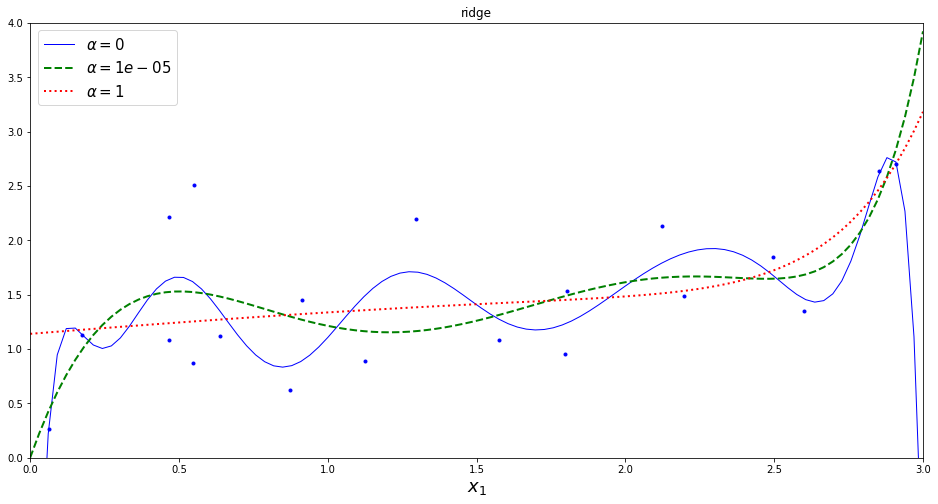

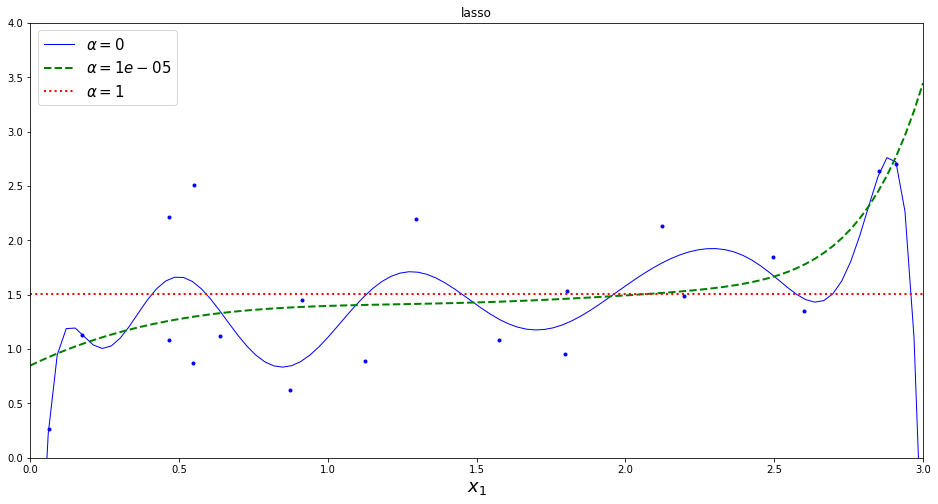

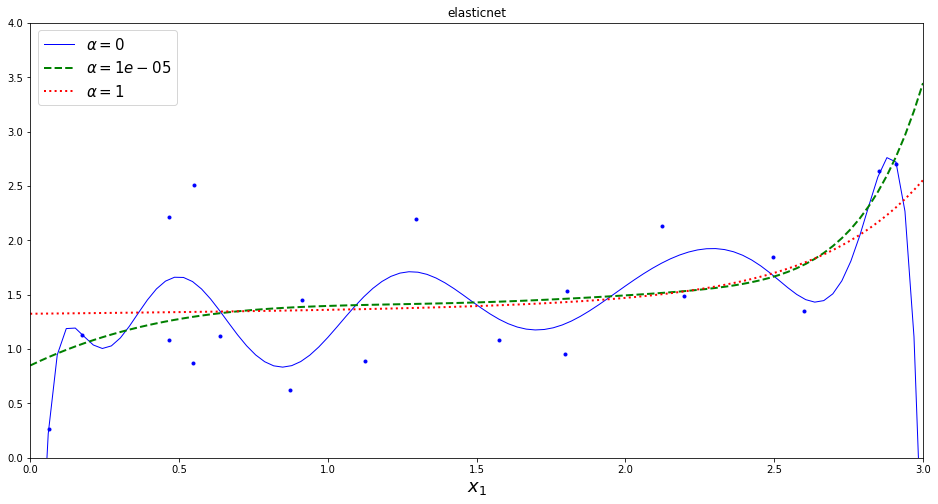

In [35]:
# TODO: Qb, just run the code..

%matplotlib inline

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, ElasticNet, Lasso

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def FitAndPlotModel(name, model_class, X, X_new, y, **model_kargs):
    plt.figure(figsize=(16,8))
    
    alphas=(0, 10**-5, 1) 
    random_state=42
    
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        #print(model_kargs)
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        model_pipe = Pipeline([
                ("poly_features", PolynomialFeatures(degree=12, include_bias=False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
            
        model_pipe.fit(X, y)
        y_new_regul = model_pipe.predict(X_new)
        
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.title(name)
    plt.axis([0, 3, 0, 4])

def GenerateData():
    np.random.seed(42)
    m = 20
    X = 3 * np.random.rand(m, 1)
    y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
    X_new = np.linspace(0, 3, 100).reshape(100, 1)
    return X, X_new, y
    
X, X_new, y = GenerateData()

FitAndPlotModel('ridge',      Ridge,        X, X_new, y)
FitAndPlotModel('lasso',      Lasso,        X, X_new, y)
FitAndPlotModel('elasticnet', ElasticNet,   X, X_new, y, l1_ratio=0.1)

Ridge bruges når penalty vægten skal være høj og straffen lille ( da den er summen af de kvadratiske værdier) 
lasso bruges når vægten skal være lav, og straffen hård! ( summen af de absolute værdier)

elastic net er kombinationen af ridge og lasso.

Alpha afgører straffen for træningen. Dette kan bruges til at sortere støj fra datasættet

### Qc Explain the Ridge, Lasso and ElasticNet Regulized Methods

Then explain the different regularization methods used for the `Ridge`, `Lasso` and `ElasticNet` models, by looking at the math formulas for the methods in the Scikit-learn documentation and/or using [HOML].


Lasso regression eliminere automatisk  ubetydelige features, hvilket giver en renere model. hvor det flat liner ved vægten 1
Ridge regression, beholder vægtene så små som muligt og bevare features meres. hvis a er 0 fungere ridge som en linear regression. hvis a er for stor, flat liner det.

Elastic net er en kombination af de 2 andre.

### Qd Regularization and Overfitting

Finally, comment on how regularization may be used to reduce a potential tendency to overfit the data

Describe the situation with the tug-of-war between the MSE and regulizer terms in $\tilde{J}$ and the potential problem of $\bw^*$ being far, far away from the origin (with $\alpha=1$ in regulizer term).

<img src="Figs/weights_regularization.png" style="width:240px">

Would data preprocessing in the form of scaling, standardization or normalization be of any help to that particular situation? If so, describe.

Regularization kan bruges hvis f.eks. dataen er overfittet, til at sortere ubetydelige features / støj fra daten!

ja, man kan preprocess for at fjerne en del af den støj der ligger i dataen, hvilket vil give bedre fitting og dermed MSE ..
